> **DO NOT EDIT IF INSIDE `caobd_s19` folder** 

# Assignment 1

**Handin in Peergrade**: *Wednesday*, February 13, 2019, 23:59<br>
**Peergrading deadline**: *Sunday*, February 16, 2019, 23:59<br>
**Peergrading feedback deadline**: *Wednesday*, February 20, 2019, 23:59

[**Feedback**](http://ulfaslak.com/vent)

## Problems

### Week 1

>**Ex 1.1.10**: `dict`s and `defaultdict`s.
1. What is a `defaultdict`? How would you say it is different from a normal Python `dict`?
2. Write some code that takes a list of tuples:

>        l = [("a", 1), ("b", 3), ("a", None), ("c", False), ("b", True), ("a", None)]

>     And produces a `defaultdict` object

>        defaultdict(<type 'list'>, {'a': [1, None, None], 'c': [False], 'b': [3, True]})

>*Hint: you can import `defaultdict` from `collections`*

ANSWERS 1.1.10

A default dict is a structure that maps keys to corresponding values. It is just like a regular dictionary, except when you 
try to look up a key that the default dict doesnt contain, it initializes that key for you based on a function you provide it beforehand. 

In [3]:
# CODE 1.1.10
from collections import defaultdict
l = [("a", 1), ("b", 3), ("a", None), ("c", False), ("b", True), ("a", None)]
ddlist = defaultdict(list)
for i, j in l:
    ddlist[i].append(j) #add each element of l to the default dict

>**Ex. 1.2.4**: The URL reveals that the data is from reddit/r/gameofthrones, but can you recover that information from the data? Give your answer by 'keying' into the JSON data using square brackets.

>*Hint: 'Keying' is a word i just made up. By it, I mean the following. Consider a JSON object such as:*
>
>        my_json_obj = {
>            'cats': {
>                'awesome': ['Missy'],
>                'useless': ['Kim', 'Frank', 'Sandy']
>            },
>            'dogs': {
>                'awesome': ['Finn', 'Dolores', 'Fido', 'Casper'],
>                'useless': []
>            }
>        }
>
>*I can get the list of useless cats by keying into `my_json_obj` like such:*
>
>        >>> my_json_obj['cats']['useless']
>        Out [ ]: ['Kim', 'Frank', 'Sandy']
>
>*`my_json_obj['cats']` returns the dictionary `{'awesome': ['Missy'], 'useless': ['Kim', 'Frank', 'Sandy']}` and getting '`useless`' from that eventually gives us `['Kim', 'Frank', 'Sandy']`. If any of those list items were a list of a dictionary themselves, we could have kept keying deeper into the structure.*

In [17]:
# CODE 1.2.4

import requests
import json
data = requests.get('https://www.reddit.com/r/gameofthrones/.json', headers = {'User-agent': 'your bot 0.1'})
myjson = data.json()
print(myjson['data']['children'][0]['data']['subreddit_name_prefixed']) #keying into the json to get the subreddit name


r/gameofthrones


>**Ex 1.2.5**: Write two `for` loops (or list comprehensions for extra street credits) which:
>1. Counts the number of spoilers.
>2. Only prints headlines that aren't spoilers.

In [18]:
# CODE and ANSWER 1.2.5.1

counter = 0
for i in myjson['data']['children']:
    if i['data']['spoiler'] == True: #if spoiler add one to spoiler counter
        counter += 1
    else:
        print(i['data']['title']) #if not spoiler, print title
        
# Although some posts below show [SPOILERS] in the title, this is because they are miscategorized. 
# or in other words, bad data. 
print(counter)

                               

[SPOILERS] Excited for the new season? Join the discussion on our Discord!
[Mod Raven] Update: All sigils have been added – here's how to get your house flair!
[SPOILERS] Daenerys Stormborn of the House Targaryen, First of Her Name, the Unburnt, Queen of the Andals and the First Men, Khaleesi of the Great Grass Sea, Breaker of Chains, and Mother of Dragons.
[SPOILERS] I'm convinced the FX artists somehow got Highgarden and Horn Hill mixed up
[NO SPOILERS] Iron Throne Ice Sculpture Carving and Johnny White Walker at Putnam, CT "Fire and Ice" Festival
[NO SPOILERS] I don’t think I’m gonna make it till April 14th. I’m too weak. It’s been too long
[NO SPOILERS] TIL The Mountain is currently working through an episodenof Ball's Palsy and is unable to move 1/2 his face
[NO SPOILERS] Daenerys by Jey Rain
[NO SPOILERS] 3D puzzle maps of Westeros and Essos
[SPOILERS] 6/67, A Golden Crown
[NO SPOILERS] trailer on 13th?
[NO SPOILERS] Classy Night King Cosplay
[SPOILERS] Game of Thrones showrunner

### Week 2

>**Ex. 2.1.2**: The `get_x_y` function below gives you the number of comments versus score for the latest `N` posts on a given `subreddit`.
3. In two seperate figures, floating side by side, scatter plot (left) the set of x and y variables for "blackmirror" and (right) x and y for "news". Remember to transform the data. My figure looks like [this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_2.2b.png).
4. Comment on any differences you see in the trends. Why might number of comments versus post upvotes look different for a TV-show than for world news?
>
>*Hint: By "transformation" I explicitly mean that you map some function onto every value in a list of values. Example: I can apply a square root transformation like `x = [np.sqrt(v) for v in x]`. A faster way to do that, of course, would be just `x = np.sqrt(x)`.*

In [68]:
import requests as rq
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def get_x_y(subreddit, N, count=25):
    
    def _get_data(subreddit, count, after):
        url = "https://www.reddit.com/r/%s/.json?count=%d&after=%s" % (subreddit, count, after)
        data = rq.get(url, headers = {'User-agent': 'sneakybot'}).json()
        print("Retrieved %d posts from page %s" % (count, after))
        return data
    
    after = ""

    x, y = [], []
    for n in range(N//count):
        data = _get_data(subreddit, count, after)
        for d in data['data']['children']:
            x.append(d['data']['num_comments']) 
            y.append(d['data']['score'])
        after = data['data']['after']

    return x, y
                          

x, y = get_x_y("blackmirror", 500, count=25)
xn, yn = get_x_y("news", 500, count = 25)

Retrieved 25 posts from page 
Retrieved 25 posts from page t3_aq0is7
Retrieved 25 posts from page t3_apeeot
Retrieved 25 posts from page t3_aos3h4
Retrieved 25 posts from page t3_aob8k8
Retrieved 25 posts from page t3_anlp8j
Retrieved 25 posts from page t3_an0l4u
Retrieved 25 posts from page t3_amnsgw
Retrieved 25 posts from page t3_amat5q
Retrieved 25 posts from page t3_allwls
Retrieved 25 posts from page t3_al4a1z
Retrieved 25 posts from page t3_akzvyk
Retrieved 25 posts from page t3_akcc4f
Retrieved 25 posts from page t3_ak2qt7
Retrieved 25 posts from page t3_ajwufz
Retrieved 25 posts from page t3_ajcyz4
Retrieved 25 posts from page t3_aiw0rp
Retrieved 25 posts from page t3_aiy1z4
Retrieved 25 posts from page t3_ailfmj
Retrieved 25 posts from page t3_ai4y2k
Retrieved 25 posts from page 
Retrieved 25 posts from page t3_aq5b2c
Retrieved 25 posts from page t3_aq1lmg
Retrieved 25 posts from page t3_aq3hhr
Retrieved 25 posts from page t3_aq8fdj
Retrieved 25 posts from page t3_apsjep
Retr

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


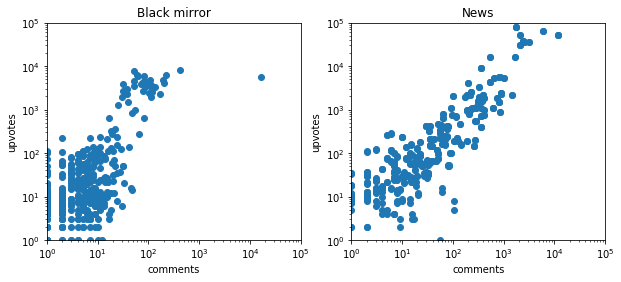

In [69]:
# CODE and ANSWER 2.1.2.3

fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey = ax1)
                          
# Black mirror plot
ax1.scatter(x,y, label = 'a legend')
ax1.set_xlabel('comments')
ax1.set_xlim([1,100000])
ax1.set_ylim([1,100000])
ax1.set_xscale('log')
ax1.set_yscale('log') #changing x and y to log scale
ax1.set_ylabel('upvotes')
ax1.set_title('Black mirror')


ax2 = fig.add_subplot(122, sharey = ax1)
# News plot
ax2.scatter(xn,yn, label = 'a legend')
ax2.set_xlim([1,100000])
ax2.set_ylim([1,100000])
ax2.set_xlabel('comments')
ax2.set_xscale('log')
ax2.set_yscale('log') #changing x and y to log scale 
ax2.set_ylabel('upvotes')
ax2.set_title('News')

plt.show()



Answer 2.1.2.3

News tends to be very negative and could incite more visceral/emotional reactions from reddit users.
As such, it yields more comments, and potentially debates between users regarding current events,
especially in light of today's polarized political atmosphere. 

>**Ex. 2.2.4**: In Data Science, we often think of matrices as (usually two-dimensional) containers for data. Let's say we collect $N=500$ data points, that each has $M=10$ features. We can loslessly represent that data using an $N \times M$ matrix, that is a matrix that has a row for each datapoint and a column for each feature. In fact, let's just go ahead and do that by altering the code of the `get_x_y` function from before a little bit.
>
>*Note: `numpy` has an object type called `matrix` but we rarely use that. Instead, we represent matrices as a `numpy` object type called `array`.*

In [70]:
def get_data_matrix(subreddit, N, count=25):
    
    def _get_data(subreddit, count, after):
        url = "https://www.reddit.com/r/%s/.json?count=%d&after=%s" % (subreddit, count, after)
        data = rq.get(url, headers = {'User-agent': 'sneakybot'}).json()
        print("Retrieved %d posts from page %s" % (count, after))
        return data
    
    after = ""

    X = []
    for n in range(N//count):
        data = _get_data(subreddit, count, after)
        for d in data['data']['children']:
            X.append([
                int(d['data']['num_comments']),
                int(d['data']['score']),
                int(d['data']['ups']),
                int(d['data']['downs']),
                len(d['data']['selftext']),
                len(d['data']['title']),
                int(d['data']['is_original_content']),
                int(d['data']['spoiler']),
                int(d['data']['num_crossposts']),
                int(d['data']['is_video'])
            ])
        after = data['data']['after']

    return np.array(X)
                          
X = get_data_matrix("news", 500, count=25)
print(X.shape)

Retrieved 25 posts from page 
Retrieved 25 posts from page t3_aq8wv6
Retrieved 25 posts from page t3_aq9yir
Retrieved 25 posts from page t3_apquap
Retrieved 25 posts from page t3_aqahzb
Retrieved 25 posts from page t3_apxpk6
Retrieved 25 posts from page t3_apl37f
Retrieved 25 posts from page t3_apfrlh
Retrieved 25 posts from page t3_apdr5i
Retrieved 25 posts from page None
Retrieved 25 posts from page t3_aq8wv6
Retrieved 25 posts from page t3_aq9yir
Retrieved 25 posts from page t3_apquap
Retrieved 25 posts from page t3_aq6p75
Retrieved 25 posts from page t3_apxpk6
Retrieved 25 posts from page t3_apl37f
Retrieved 25 posts from page t3_apfrlh
Retrieved 25 posts from page t3_apdr5i
Retrieved 25 posts from page None
Retrieved 25 posts from page t3_aq8wv6
(454, 10)


In [27]:
X

NameError: name 'X' is not defined

>Here are the data, but how can we summarize them? Let's start by finding the so-called *covariance matrix*.
1. Use the `np.cov` method on `X` to get its $10 \times 10$ covariance matrix.
2. Do you notice any characteristics of this matrix that are interesting? Comment.
3. Plot the distribution of covariances, e.g. using a histogram.

(10, 10)


([array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([8., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
  array([8., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])],
 array([-9.07178866e+01,  1.14019708e+07,  2.28040322e+07,  3.42060937e+07,
         4.56081552e+07,  5.70102167e+07,  6.84122781e+07,  7.98143396e+07,
         9.12164011e+07,  1.02618463e+08,  1.14020524e+08]),
 <a list of 10 Lists of Patches objects>)

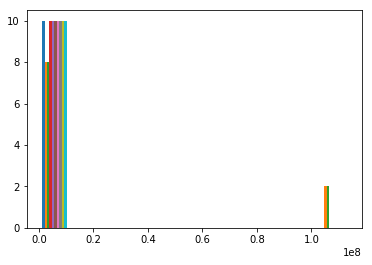

In [74]:
#2.2.4.1
covar = np.cov(X, rowvar = False)
print(covar.shape)

#2.2.4.2 The entire first column has high values, most of them being 10. However, all the other columns are zero, with the exception of the last row. The numbers in the last row are very large. 

#2.2.4.3
plt.hist(covar)



>**Ex. 2.2.5**: There's another use of the covariance matrix, other than just learning how features co-vary. In fact, it turns out that the *eigenvectors* of the covariance matrix are a set of mutually orthogonal vectors, that point in the directions of greatest variance in the data. The eigenvector with the greatest *eigenvalue* points along the direction of greatest variation, and so on. This is pretty neat, because if we know along which axes the data is most stretched, we can figure out how best to project it when visualizing it in 2D as a scatter plot! This whole procedure has a name: **Principal Component Analysis** (PCA) and it was invented by Karl Pearson in 1901. It belongs to a powerful class of linear algebra methods called **Matrix Factorization** methods. Ok, so rather than spending too much time on the math of PCA, let's just use the `sklearn` implementation and fit a PCA on `X`.

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

>1. Explain what the matrix you get when you call `pca.components_` means.
2. Explain what the vector you get when you call `pca.explained_variance_ratio_` means. What insights about our data can we extract from this?
3. Transform X using the PCA you just fitted, and scatter plot the first two dimensions of the transformed data. Please comment on what you see.
3. Scatter plot dimensions 1 and 3 against each other. See something interesting now? What would be a way to figure out what the clusters represent?

2.2.5.1 The components of the matrix represent the directions of maximum variance. The dimensions are components * features. 
2.2.5.2 Explained variance ratio tells you the percentage of the data's variance that is explained by a given component's direction. The highest number in the vector tells you the component along which the data varies the most. Additionally, you can drop vectors that are "less important" to the data's variance (ie their values in the vector are smaller). 
2.2.5.3 There is a small cluster on the left, and the rest of the data points are scattered relatively randomly. 
2.2.5.4 There is a rather large cluster that runs parallel to the y axis (in this case dimension three). 

[[ 5.34208296e-02  7.06097091e-01  7.06097091e-01 -0.00000000e+00
  -0.00000000e+00  1.85179025e-05 -0.00000000e+00 -0.00000000e+00
   1.09627524e-04 -0.00000000e+00]
 [ 9.98571938e-01 -3.77742280e-02 -3.77742280e-02 -0.00000000e+00
  -0.00000000e+00 -5.33193771e-04 -0.00000000e+00 -0.00000000e+00
   1.22563666e-04 -0.00000000e+00]
 [ 5.32059789e-04 -3.28625507e-05 -3.28625507e-05 -0.00000000e+00
  -0.00000000e+00  9.99988062e-01 -0.00000000e+00 -0.00000000e+00
  -4.85693557e-03 -0.00000000e+00]
 [-1.25662335e-04 -7.29384005e-05 -7.29384005e-05 -1.11022302e-16
   0.00000000e+00  4.85699827e-03  0.00000000e+00  0.00000000e+00
   9.99988191e-01  0.00000000e+00]
 [ 1.71143786e-15  7.07106781e-01 -7.07106781e-01  2.21958263e-07
  -0.00000000e+00 -1.21475833e-15 -0.00000000e+00 -0.00000000e+00
  -7.51209804e-15 -0.00000000e+00]
 [ 1.69202311e-20  1.56948193e-07 -1.56948193e-07 -1.00000000e+00
   6.41355814e-14  1.68481660e-17 -0.00000000e+00 -0.00000000e+00
  -5.92346999e-17 -0.00000000e+00

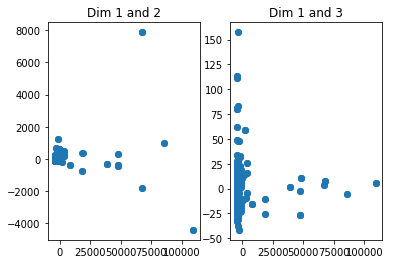

In [73]:
import matplotlib.pyplot as plt

pca.fit(X)
print(pca.components_)
Xtrans = pca.transform(X)

print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(1,2)
ax[0].scatter(Xtrans[:,0], Xtrans[:,1])
ax[0].set_title("Dim 1 and 2")

ax[1].scatter(Xtrans[:,0], Xtrans[:,2])
ax[1].set_title("Dim 1 and 3")

plt.show()

>**Ex. 2.3.4**: People often use the p-value to gauge the *significance* of a given result. If the p-value of a result is low, the result is significant (which is good) and vice versa. Intuitively, the p-value measures the probabilty that a result *could have been obtained at random*, so you can imagine that if you find that the p-value for some result is HIGH (close to one), regardless of how cool it is, people will not care because, well, you just got lucky with that measurement, didn't you? I created two lists for you below, and you are going to find out if they are *significantly* correlated. You will be using the significance threshold 0.05 (which is arbitrary, disputed, yet very standard in the literature).

In [28]:
# You can incresae this to make the data more noisy (but let it be 4 for now)
noise_level = 4

# I'm just seeding the random number generator here, so we can compare results
np.random.seed(0)

# This is your data
x = np.arange(0, 20) + np.random.normal(size=20) * noise_level
y = np.arange(0, 20) + np.random.normal(size=20) * noise_level

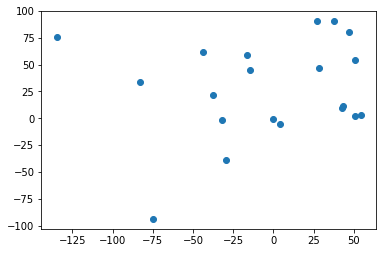

In [33]:
# Why not make a scatter plot here, to see what you're working with?
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr 

plt.scatter(x,y)

>4. Plot the p-value as a function of `noise_level` (let `noise_level` vary between 1 and 50), so we can see how our result becomes less and less significant as we increase the noise. Two questions: (1) at which value of `noise_level` does the correlation become insignificant, and (2) which p-value does the curve saturate at for large `noise_level`?

p value 2.1039479756093096e-15  noise level 1
p value 3.9478839600820913e-07  noise level 2
p value 0.00026698803860844675  noise level 3
p value 0.003030352248101497  noise level 4
p value 0.022686272989947964  noise level 5
p value 0.2652162593818173  noise level 6
p value 0.02728776421145625  noise level 7
p value 0.330799018592378  noise level 8
p value 0.5698348307870619  noise level 9
p value 0.2867087709946364  noise level 10
p value 0.9246875566123663  noise level 11
p value 0.028311693265495378  noise level 12
p value 0.9852115938387687  noise level 13
p value 0.3198727354102181  noise level 14
p value 0.3280311457338903  noise level 15
p value 0.05983546025401222  noise level 16
p value 0.07138225003779211  noise level 17
p value 0.044022998420852506  noise level 18
p value 0.3811454442576315  noise level 19
p value 0.9923748874004948  noise level 20
p value 0.32721153077785947  noise level 21
p value 0.5071994084328086  noise level 22
p value 0.8681272851413647  noise level 

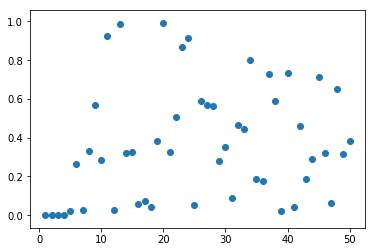

In [36]:
# CODE and ANSWER 2.3.4.4

noiselevels = []
pvalarray = []
# This is your data
for j in range(1,51):
    noiselevels.append(j)
    x = np.arange(0, 20) + np.random.normal(size=20) * j
    y = np.arange(0, 20) + np.random.normal(size=20) * j
    _, pval = pearsonr(x,y)
    pvalarray.append(pval)
    print('p value', pval, ' noise level', j)
plt.scatter(noiselevels, pvalarray)

# 2.3.4.4.1) the first time the p value becomes insignificant is at noise level = 6.
# 2.3.4.4.2) there is no clear saturation point.

### Week 3

>**Ex. 3.1.1**: From the Wikipedia API, get a list of all Marvel superheroes and another list of all Marvel supervillains. Use 'Category:Marvel_Comics_supervillains' and 'Category:Marvel_Comics_superheroes' to get the characters in each category.
1. How many superheroes are there? How many supervillains?
2. How many characters are both heroes and villains? What is the Jaccard similarity between the two groups?

>*Hint: Google something like "get list all pages in category wikimedia api" if you're struggling with the query.*

In [63]:
# CODE 3.1.1.1

import json
import requests as rq

link = "http://en.wikipedia.org/w/api.php"
villains = []
heroes = []
PARAMS = {
 
    'action': "query",
    'list': "categorymembers",
    'cmtitle': ["Category:Marvel_Comics_supervillains"],
    'cmcontinue': "",
    'format': "json"
    }
for j in range(2): #this loops through villains and superheroes
    if j == 1:
        PARAMS['cmtitle'] = ["Category:Marvel_Comics_superheroes"]
        PARAMS['cmcontinue'] = ""
    
    while True:

        R = rq.Session().get(url=link, params=PARAMS)
        myjson = R.json()
        print(myjson)
        if j == 0:
            for k in myjson['query']['categorymembers']:
                if k['title'].find("Category") == -1: 
                    print(k['title'])
                    villains.append(k['title']) 
        else:
            for i in myjson['query']['categorymembers']:
                if i['title'].find("Category") == -1:
                    print(i['title'])
                    heroes.append(i['title'])
                    

        try:
            PARAMS['cmcontinue'] = myjson['continue']['cmcontinue']
        
        except:
            break
    

print(len(villains))
print(len(heroes))

{'batchcomplete': '', 'continue': {'cmcontinue': 'page|29334f314b4d37452d3d04098c2d4541392d4d098e011701dc16|6658289', 'continue': '-||'}, 'query': {'categorymembers': [{'pageid': 850460, 'ns': 0, 'title': 'Abomination (comics)'}, {'pageid': 5510126, 'ns': 0, 'title': 'Absalom (comics)'}, {'pageid': 561267, 'ns': 0, 'title': 'Absorbing Man'}, {'pageid': 707597, 'ns': 0, 'title': 'Abyss (comics)'}, {'pageid': 28053882, 'ns': 0, 'title': 'Achilles (Pantheon)'}, {'pageid': 16249620, 'ns': 0, 'title': 'Acrobat (comics)'}, {'pageid': 16455416, 'ns': 0, 'title': 'Adam II'}, {'pageid': 52201632, 'ns': 0, 'title': 'Adria (comics)'}, {'pageid': 1217008, 'ns': 0, 'title': 'Adversary (comics)'}, {'pageid': 12484567, 'ns': 0, 'title': 'Advisor (comics)'}]}}
Abomination (comics)
Absalom (comics)
Absorbing Man
Abyss (comics)
Achilles (Pantheon)
Acrobat (comics)
Adam II
Adria (comics)
Adversary (comics)
Advisor (comics)
{'batchcomplete': '', 'continue': {'cmcontinue': 'page|293f3d37314129010b01dc0a|65

{'batchcomplete': '', 'continue': {'cmcontinue': 'page|2b3f45452f3f514d4f04098c2d4541392d4d098e011601dc15|5392106', 'continue': '-||'}, 'query': {'categorymembers': [{'pageid': 723879, 'ns': 0, 'title': 'Blackheart'}, {'pageid': 54158899, 'ns': 0, 'title': 'Blackout (Lilin)'}, {'pageid': 871651, 'ns': 0, 'title': 'Blackout (Marcus Daniels)'}, {'pageid': 8017675, 'ns': 0, 'title': 'Blackwing'}, {'pageid': 2005025, 'ns': 0, 'title': 'Blastaar'}, {'pageid': 3691625, 'ns': 0, 'title': 'Siena Blaze'}, {'pageid': 2117656, 'ns': 0, 'title': 'Blizzard (comics)'}, {'pageid': 433329, 'ns': 0, 'title': 'Blob (comics)'}, {'pageid': 9280645, 'ns': 0, 'title': 'Blood Brothers (comics)'}, {'pageid': 850264, 'ns': 0, 'title': 'Bloodaxe (comics)'}]}}
Blackheart
Blackout (Lilin)
Blackout (Marcus Daniels)
Blackwing
Blastaar
Siena Blaze
Blizzard (comics)
Blob (comics)
Blood Brothers (comics)
Bloodaxe (comics)
{'batchcomplete': '', 'continue': {'cmcontinue': 'page|2b454541314b29433504098c2d4541392d4d098e01

{'batchcomplete': '', 'continue': {'cmcontinue': 'page|2d454b4b51474f454b010d01dc0c|5569514', 'continue': '-||'}, 'query': {'categorymembers': [{'pageid': 3019965, 'ns': 0, 'title': 'Collector (comics)'}, {'pageid': 734279, 'ns': 0, 'title': 'Rusty Collins'}, {'pageid': 49158108, 'ns': 0, 'title': 'Comanche (comics)'}, {'pageid': 11741777, 'ns': 0, 'title': 'Commander Kraken'}, {'pageid': 12530229, 'ns': 0, 'title': 'Condor (comics)'}, {'pageid': 2984918, 'ns': 0, 'title': 'Constrictor (comics)'}, {'pageid': 5544702, 'ns': 0, 'title': 'Controller (Marvel Comics)'}, {'pageid': 1975719, 'ns': 0, 'title': 'Copperhead (Marvel Comics)'}, {'pageid': 3014761, 'ns': 0, 'title': 'Copycat (Marvel Comics)'}, {'pageid': 4892924, 'ns': 0, 'title': 'Abraham Cornelius'}]}}
Collector (comics)
Rusty Collins
Comanche (comics)
Commander Kraken
Condor (comics)
Constrictor (comics)
Controller (Marvel Comics)
Copperhead (Marvel Comics)
Copycat (Marvel Comics)
Abraham Cornelius
{'batchcomplete': '', 'continu

{'batchcomplete': '', 'continue': {'cmcontinue': 'page|2f4b312f4151432f044f3731042f4b51392f011601dcbadc08|12695758', 'continue': '-||'}, 'query': {'categorymembers': [{'pageid': 35812323, 'ns': 0, 'title': 'Dorrek VII'}, {'pageid': 13875118, 'ns': 0, 'title': 'Doughboy (comics)'}, {'pageid': 5043742, 'ns': 0, 'title': 'Dracula (Marvel Comics)'}, {'pageid': 12671282, 'ns': 0, 'title': 'Dragon Lord (comics)'}, {'pageid': 2184364, 'ns': 0, 'title': 'Dragon Man'}, {'pageid': 5278966, 'ns': 0, 'title': 'Dragoness (comics)'}, {'pageid': 7142037, 'ns': 0, 'title': 'Dragonfly (Marvel Comics)'}, {'pageid': 5544730, 'ns': 0, 'title': 'Dreadknight'}, {'pageid': 5544751, 'ns': 0, 'title': 'Dreadnought (comics)'}, {'pageid': 7893378, 'ns': 0, 'title': 'Dreamqueen'}]}}
Dorrek VII
Doughboy (comics)
Dracula (Marvel Comics)
Dragon Lord (comics)
Dragon Man
Dragoness (comics)
Dragonfly (Marvel Comics)
Dreadknight
Dreadnought (comics)
Dreamqueen
{'batchcomplete': '', 'continue': {'cmcontinue': 'page|31414

{'batchcomplete': '', 'continue': {'cmcontinue': 'page|35453f2f2b513504098c2d4541392d4d098e011401dc13|6719734', 'continue': '-||'}, 'query': {'categorymembers': [{'pageid': 5631467, 'ns': 0, 'title': 'Gilded Lily (character)'}, {'pageid': 20928358, 'ns': 0, 'title': 'Ginniyeh'}, {'pageid': 1911479, 'ns': 0, 'title': 'Gladiator (Melvin Potter)'}, {'pageid': 6145983, 'ns': 0, 'title': 'Gladiatrix (comics)'}, {'pageid': 7368425, 'ns': 0, 'title': 'Glob (comics)'}, {'pageid': 5279527, 'ns': 0, 'title': 'Glob Herman'}, {'pageid': 9550746, 'ns': 0, 'title': 'Glowworm (comics)'}, {'pageid': 39829376, 'ns': 0, 'title': 'Goblin (Marvel Comics)'}, {'pageid': 2144334, 'ns': 0, 'title': 'Goddess (comics)'}, {'pageid': 14959310, 'ns': 0, 'title': 'Gog (Marvel Comics)'}]}}
Gilded Lily (character)
Ginniyeh
Gladiator (Melvin Potter)
Gladiatrix (comics)
Glob (comics)
Glob Herman
Glowworm (comics)
Goblin (Marvel Comics)
Goddess (comics)
Gog (Marvel Comics)
{'batchcomplete': '', 'continue': {'cmcontinue'

{'batchcomplete': '', 'continue': {'cmcontinue': 'page|3b294d47314b4d06043b3941030641292f043b3941043b294d47314b4d012001dcbedcc3dcc3dcc3dc0a|1423914', 'continue': '-||'}, 'query': {'categorymembers': [{'pageid': 4755432, 'ns': 0, 'title': 'Iron Monger'}, {'pageid': 4250586, 'ns': 0, 'title': 'Iron Spider'}, {'pageid': 6999381, 'ns': 0, 'title': 'Ironclad (comics)'}, {'pageid': 13192975, 'ns': 0, 'title': 'ISAAC (comics)'}, {'pageid': 6710957, 'ns': 0, 'title': 'Isbisa'}, {'pageid': 43613912, 'ns': 0, 'title': "J'son (comics)"}, {'pageid': 2256172, 'ns': 0, 'title': "Jack O'Lantern (Marvel Comics)"}, {'pageid': 1321810, 'ns': 0, 'title': 'Jackal (Marvel Comics)'}, {'pageid': 8017092, 'ns': 0, 'title': 'Jackhammer (comics)'}, {'pageid': 4605642, 'ns': 0, 'title': 'Brent Jackson'}]}}
Iron Monger
Iron Spider
Ironclad (comics)
ISAAC (comics)
Isbisa
J'son (comics)
Jack O'Lantern (Marvel Comics)
Jackal (Marvel Comics)
Jackhammer (comics)
Brent Jackson
{'batchcomplete': '', 'continue': {'cmcont

{'batchcomplete': '', 'continue': {'cmcontinue': 'page|3f454d4d04098c2d4541392d4d098e03063f454d4d04098c2d4541392d4d098e011f01dcc1dcbfdc10|4193945', 'continue': '-||'}, 'query': {'categorymembers': [{'pageid': 4524562, 'ns': 0, 'title': 'Lobo Brothers'}, {'pageid': 5163396, 'ns': 0, 'title': 'Locus (comics)'}, {'pageid': 5857695, 'ns': 0, 'title': 'Locust (comics)'}, {'pageid': 8020285, 'ns': 0, 'title': 'Lodestone (comics)'}, {'pageid': 1702675, 'ns': 0, 'title': 'Loki (comics)'}, {'pageid': 21296304, 'ns': 0, 'title': 'Lois London'}, {'pageid': 8171200, 'ns': 0, 'title': 'Looter (comics)'}, {'pageid': 2236419, 'ns': 0, 'title': 'Lord Dark Wind'}, {'pageid': 7484665, 'ns': 0, 'title': 'Lorelei (Asgardian)'}, {'pageid': 6908123, 'ns': 0, 'title': 'Lorelei (Mutate)'}]}}
Lobo Brothers
Locus (comics)
Locust (comics)
Lodestone (comics)
Loki (comics)
Lois London
Looter (comics)
Lord Dark Wind
Lorelei (Asgardian)
Lorelei (Mutate)
{'batchcomplete': '', 'continue': {'cmcontinue': 'page|41292d37

{'batchcomplete': '', 'continue': {'cmcontinue': 'page|41394d4f314b045704098c41294b53313f042d4541392d4d098e011c01dcc0dcc4dcc0dc0a|616597', 'continue': '-||'}, 'query': {'categorymembers': [{'pageid': 1569804, 'ns': 0, 'title': 'Mindworm'}, {'pageid': 47340783, 'ns': 0, 'title': 'Minotaur (comics)'}, {'pageid': 5602957, 'ns': 0, 'title': 'Miracle Man'}, {'pageid': 7908271, 'ns': 0, 'title': 'Mirage (Marvel Comics)'}, {'pageid': 13522465, 'ns': 0, 'title': 'Missing Link (comics)'}, {'pageid': 4906415, 'ns': 0, 'title': 'Mister Fear'}, {'pageid': 1548014, 'ns': 0, 'title': 'Mister Hyde (comics)'}, {'pageid': 1615408, 'ns': 0, 'title': 'Mister Jip'}, {'pageid': 15389541, 'ns': 0, 'title': 'Mister Negative'}, {'pageid': 42469737, 'ns': 0, 'title': 'Mister Rasputin'}]}}
Mindworm
Minotaur (comics)
Miracle Man
Mirage (Marvel Comics)
Missing Link (comics)
Mister Fear
Mister Hyde (comics)
Mister Jip
Mister Negative
Mister Rasputin
{'batchcomplete': '', 'continue': {'cmcontinue': 'page|4145433545

{'batchcomplete': '', 'continue': {'cmcontinue': 'page|47313147314b4d04098c41294b53313f042d4541392d4d098e011b01dcbedcc0dc0a|4665455', 'continue': '-||'}, 'query': {'categorymembers': [{'pageid': 18842058, 'ns': 0, 'title': 'Norman Osborn'}, {'pageid': 10267749, 'ns': 0, 'title': 'Otomo (comics)'}, {'pageid': 38221346, 'ns': 0, 'title': 'Overdrive (comics)'}, {'pageid': 6432858, 'ns': 0, 'title': 'Overmind (comics)'}, {'pageid': 664019, 'ns': 0, 'title': 'Owl (Marvel Comics)'}, {'pageid': 6070404, 'ns': 0, 'title': 'Ox (comics)'}, {'pageid': 5721458, 'ns': 0, 'title': 'Paibok'}, {'pageid': 42511096, 'ns': 0, 'title': 'Painter (comics)'}, {'pageid': 3441215, 'ns': 0, 'title': 'Paragon (comics)'}, {'pageid': 8442918, 'ns': 0, 'title': 'Pasco (comics)'}]}}
Norman Osborn
Otomo (comics)
Overdrive (comics)
Overmind (comics)
Owl (Marvel Comics)
Ox (comics)
Paibok
Painter (comics)
Paragon (comics)
Pasco (comics)
{'batchcomplete': '', 'continue': {'cmcontinue': 'page|4739314b2d3106042f4543293f2f

{'batchcomplete': '', 'continue': {'cmcontinue': 'page|4b39473b293d010a01dc09|5678299', 'continue': '-||'}, 'query': {'categorymembers': [{'pageid': 504988, 'ns': 0, 'title': 'Ben Reilly'}, {'pageid': 18810785, 'ns': 0, 'title': 'Reptilla'}, {'pageid': 17734837, 'ns': 0, 'title': 'Reptyl'}, {'pageid': 15492046, 'ns': 0, 'title': 'Rev (comics)'}, {'pageid': 4603342, 'ns': 0, 'title': 'Rhapsody (comics)'}, {'pageid': 315883, 'ns': 0, 'title': 'Rhino (comics)'}, {'pageid': 21216728, 'ns': 0, 'title': 'Val Rhymin'}, {'pageid': 5592419, 'ns': 0, 'title': 'Ringer (comics)'}, {'pageid': 3972890, 'ns': 0, 'title': 'Ringmaster (comics)'}, {'pageid': 33527139, 'ns': 0, 'title': 'Riot (comics)'}]}}
Ben Reilly
Reptilla
Reptyl
Rev (comics)
Rhapsody (comics)
Rhino (comics)
Val Rhymin
Ringer (comics)
Ringmaster (comics)
Riot (comics)
{'batchcomplete': '', 'continue': {'cmcontinue': 'page|4b454d3103064b454d3104098c41294b53313f042d4541392d4d098e011d01dcc2dcc1dcc0dc0a|17353383', 'continue': '-||'}, 'que

{'batchcomplete': '', 'continue': {'cmcontinue': 'page|4d3d31394304098c2d4541392d4d098e011201dc11|2783860', 'continue': '-||'}, 'query': {'categorymembers': [{'pageid': 1369582, 'ns': 0, 'title': 'Sidewinder (comics)'}, {'pageid': 6432656, 'ns': 0, 'title': 'Silk Fever'}, {'pageid': 4056346, 'ns': 0, 'title': 'Samuel Silke'}, {'pageid': 13733855, 'ns': 0, 'title': 'Silver Dagger (comics)'}, {'pageid': 313050, 'ns': 0, 'title': 'Silver Fox (comics)'}, {'pageid': 397704, 'ns': 0, 'title': 'Silver Samurai'}, {'pageid': 2177806, 'ns': 0, 'title': 'Silvermane'}, {'pageid': 4854114, 'ns': 0, 'title': 'Sin (Marvel Comics)'}, {'pageid': 10336271, 'ns': 0, 'title': 'Sin-Eater (comics)'}, {'pageid': 528214, 'ns': 0, 'title': 'Mister Sinister'}]}}
Sidewinder (comics)
Silk Fever
Samuel Silke
Silver Dagger (comics)
Silver Fox (comics)
Silver Samurai
Silvermane
Sin (Marvel Comics)
Sin-Eater (comics)
Mister Sinister
{'batchcomplete': '', 'continue': {'cmcontinue': 'page|4d3f513504098c2d4541392d4d098e

{'batchcomplete': '', 'continue': {'cmcontinue': 'page|4f294d3d41294d4f314b04098c2d4541392d4d098e011701dc16|875841', 'continue': '-||'}, 'query': {'categorymembers': [{'pageid': 12280993, 'ns': 0, 'title': 'Sushi (comics)'}, {'pageid': 37986872, 'ns': 0, 'title': 'Svyatogor (comics)'}, {'pageid': 2600454, 'ns': 0, 'title': 'Swarm (comics)'}, {'pageid': 5676510, 'ns': 0, 'title': 'Switch (comics)'}, {'pageid': 2198491, 'ns': 0, 'title': 'Swordsman (comics)'}, {'pageid': 37874941, 'ns': 0, 'title': 'Synapse (comics)'}, {'pageid': 4354605, 'ns': 0, 'title': 'T-Ray (comics)'}, {'pageid': 9318530, 'ns': 0, 'title': 'Tai (comics)'}, {'pageid': 840144, 'ns': 0, 'title': 'Glenn Talbot'}, {'pageid': 3701104, 'ns': 0, 'title': 'Tarantula (Marvel Comics)'}]}}
Sushi (comics)
Svyatogor (comics)
Swarm (comics)
Switch (comics)
Swordsman (comics)
Synapse (comics)
T-Ray (comics)
Tai (comics)
Glenn Talbot
Tarantula (Marvel Comics)
{'batchcomplete': '', 'continue': {'cmcontinue': 'page|4f372943294f454d04

{'batchcomplete': '', 'continue': {'cmcontinue': 'page|53453f2d29432904098c41294b53313f042d4541392d4d098e011b01dcbedcc0dc0a|1345992', 'continue': '-||'}, 'query': {'categorymembers': [{'pageid': 17574244, 'ns': 0, 'title': 'Veranke'}, {'pageid': 30861584, 'ns': 0, 'title': 'Vermin (comics)'}, {'pageid': 5602145, 'ns': 0, 'title': 'Kristoff Vernard'}, {'pageid': 1454201, 'ns': 0, 'title': 'Vertigo (Marvel Comics)'}, {'pageid': 4297337, 'ns': 0, 'title': 'Vindaloo (comics)'}, {'pageid': 2089542, 'ns': 0, 'title': 'Viper (Marvel Comics)'}, {'pageid': 3167609, 'ns': 0, 'title': 'Viper (Madame Hydra)'}, {'pageid': 11474707, 'ns': 0, 'title': 'Virgo (comics)'}, {'pageid': 5638782, 'ns': 0, 'title': 'Visimajoris'}, {'pageid': 4077778, 'ns': 0, 'title': 'Amelia Voght'}]}}
Veranke
Vermin (comics)
Kristoff Vernard
Vertigo (Marvel Comics)
Vindaloo (comics)
Viper (Marvel Comics)
Viper (Madame Hydra)
Virgo (comics)
Visimajoris
Amelia Voght
{'batchcomplete': '', 'continue': {'cmcontinue': 'page|5529

{'batchcomplete': '', 'continue': {'cmcontinue': 'page|2b29434d37313104098c2d4541392d4d098e03062b29434d37313104098c2d4541392d4d098e012501dcbedcbfdc13|303682', 'continue': '-||'}, 'query': {'categorymembers': [{'pageid': 9542809, 'ns': 0, 'title': 'Armor (comics)'}, {'pageid': 15154230, 'ns': 0, 'title': 'Arnold Roth (Captain America)'}, {'pageid': 9023060, 'ns': 0, 'title': 'Astra (Imperial Guard)'}, {'pageid': 2312277, 'ns': 0, 'title': 'Vance Astro'}, {'pageid': 1162995, 'ns': 0, 'title': 'Vance Astrovik'}, {'pageid': 10022476, 'ns': 0, 'title': 'Athena (Marvel Comics)'}, {'pageid': 5319002, 'ns': 0, 'title': 'Auric (comics)'}, {'pageid': 733410, 'ns': 0, 'title': 'Aurora (comics)'}, {'pageid': 26163448, 'ns': 0, 'title': 'Backhand (comics)'}, {'pageid': 850544, 'ns': 0, 'title': 'Balder (comics)'}]}}
Armor (comics)
Arnold Roth (Captain America)
Astra (Imperial Guard)
Vance Astro
Vance Astrovik
Athena (Marvel Comics)
Auric (comics)
Aurora (comics)
Backhand (comics)
Balder (comics)
{'

{'batchcomplete': '', 'continue': {'cmcontinue': 'page|2d370968452f010901dc08|10431724', 'continue': '-||'}, 'query': {'categorymembers': [{'pageid': 733243, 'ns': 0, 'title': 'Captain Ultra'}, {'pageid': 610564, 'ns': 0, 'title': 'Captain Universe'}, {'pageid': 4223954, 'ns': 0, 'title': 'Cardiac (comics)'}, {'pageid': 3842196, 'ns': 0, 'title': 'Cardinal (comics)'}, {'pageid': 9561576, 'ns': 0, 'title': 'Caretaker (comics)'}, {'pageid': 1846666, 'ns': 0, 'title': 'Joanna Cargill'}, {'pageid': 8394159, 'ns': 0, 'title': 'John Carik'}, {'pageid': 2742187, 'ns': 0, 'title': 'Julia Carpenter'}, {'pageid': 1181900, 'ns': 0, 'title': 'Cerebra'}, {'pageid': 733258, 'ns': 0, 'title': 'Cerise (comics)'}]}}
Captain Ultra
Captain Universe
Cardiac (comics)
Cardinal (comics)
Caretaker (comics)
Joanna Cargill
John Carik
Julia Carpenter
Cerebra
Cerise (comics)
{'batchcomplete': '', 'continue': {'cmcontinue': 'page|2d394f395b31430453010d01dcbfdc|1850041', 'continue': '-||'}, 'query': {'categorymembe

{'batchcomplete': '', 'continue': {'cmcontinue': 'page|3329432f4b293f010b01dc0a|3510420', 'continue': '-||'}, 'query': {'categorymembers': [{'pageid': 2651477, 'ns': 0, 'title': 'Echo (Marvel Comics)'}, {'pageid': 2706950, 'ns': 0, 'title': 'Ethan Edwards'}, {'pageid': 1200368, 'ns': 0, 'title': 'Elixir (comics)'}, {'pageid': 2161245, 'ns': 0, 'title': 'Elsie-Dee'}, {'pageid': 14070775, 'ns': 0, 'title': 'Elysius'}, {'pageid': 2456032, 'ns': 0, 'title': 'Empath (comics)'}, {'pageid': 27500537, 'ns': 0, 'title': 'Enigma (Marvel Comics)'}, {'pageid': 2559192, 'ns': 0, 'title': 'Erg (comics)'}, {'pageid': 1867666, 'ns': 0, 'title': 'Ezekiel (comics)'}, {'pageid': 1417360, 'ns': 0, 'title': 'Falcon (comics)'}]}}
Echo (Marvel Comics)
Ethan Edwards
Elixir (comics)
Elsie-Dee
Elysius
Empath (comics)
Enigma (Marvel Comics)
Erg (comics)
Ezekiel (comics)
Falcon (comics)
{'batchcomplete': '', 'continue': {'cmcontinue': 'page|333957314b04098c2d4541392d4d098e011201dc11|1203569', 'continue': '-||'}, 

{'batchcomplete': '', 'continue': {'cmcontinue': 'page|37313f3f4d4f4b454106042f293941454303062f29394145430437313f3f4d4f4b454101250501dcbcdcc0dcc0dc0c|747390', 'continue': '-||'}, 'query': {'categorymembers': [{'pageid': 393887, 'ns': 0, 'title': 'Havok (comics)'}, {'pageid': 26289750, 'ns': 0, 'title': 'Hawkeye (comics)'}, {'pageid': 2609621, 'ns': 0, 'title': 'Hawkeye (Kate Bishop)'}, {'pageid': 2080337, 'ns': 0, 'title': 'Molly Hayes'}, {'pageid': 5681212, 'ns': 0, 'title': 'Haywire (comics)'}, {'pageid': 54134708, 'ns': 0, 'title': 'Headhunter (comics)'}, {'pageid': 14385099, 'ns': 0, 'title': 'Hector (Marvel Comics)'}, {'pageid': 5548315, 'ns': 0, 'title': 'Helix (Marvel Comics)'}, {'pageid': 37862511, 'ns': 0, 'title': 'Hellfire (J. T. Slade)'}, {'pageid': 1807872, 'ns': 0, 'title': 'Hellion (Marvel Comics)'}]}}
Havok (comics)
Hawkeye (comics)
Hawkeye (Kate Bishop)
Molly Hayes
Haywire (comics)
Headhunter (comics)
Hector (Marvel Comics)
Helix (Marvel Comics)
Hellfire (J. T. Slade)


{'batchcomplete': '', 'continue': {'cmcontinue': 'page|3d4b295339434533330604293f59454d372903063d4b29533143044f3731043751434f314b04098c293f59454d3729043d4b29533943453333098e01251b01dcbcdcbfdcbcdcbfdcbfdc0d|5989262', 'continue': '-||'}, 'query': {'categorymembers': [{'pageid': 55301399, 'ns': 0, 'title': 'Kid Kaiju'}, {'pageid': 8934744, 'ns': 0, 'title': 'Killpower'}, {'pageid': 733324, 'ns': 0, 'title': 'Killraven'}, {'pageid': 56591780, 'ns': 0, 'title': 'King Arthur (Marvel Comics)'}, {'pageid': 558293, 'ns': 0, 'title': 'Hannibal King'}, {'pageid': 1494841, 'ns': 0, 'title': 'Kismet (Marvel Comics)'}, {'pageid': 5136102, 'ns': 0, 'title': 'Misty Knight'}, {'pageid': 11367739, 'ns': 0, 'title': 'Komodo (comics)'}, {'pageid': 5734515, 'ns': 0, 'title': 'Korg (comics)'}, {'pageid': 13849807, 'ns': 0, 'title': 'Korvus'}]}}
Kid Kaiju
Killpower
Killraven
King Arthur (Marvel Comics)
Hannibal King
Kismet (Marvel Comics)
Misty Knight
Komodo (comics)
Korg (comics)
Korvus
{'batchcomplete': ''

{'batchcomplete': '', 'continue': {'cmcontinue': 'page|432941454b010901dc08|273467', 'continue': '-||'}, 'query': {'categorymembers': [{'pageid': 719805, 'ns': 0, 'title': 'Danielle Moonstar'}, {'pageid': 2404743, 'ns': 0, 'title': 'Karla Sofen'}, {'pageid': 1809522, 'ns': 0, 'title': 'Morbius, the Living Vampire'}, {'pageid': 8420623, 'ns': 0, 'title': 'Motormouth (comics)'}, {'pageid': 41081188, 'ns': 0, 'title': 'Ms. Marvel'}, {'pageid': 4572183, 'ns': 0, 'title': 'Murmur (Marvel Comics)'}, {'pageid': 237080, 'ns': 0, 'title': 'Mystique (comics)'}, {'pageid': 6408760, 'ns': 0, 'title': "N'Kantu, the Living Mummy"}, {'pageid': 55511277, 'ns': 0, 'title': 'Nadia van Dyne'}, {'pageid': 5604343, 'ns': 0, 'title': 'Nahrees'}]}}
Danielle Moonstar
Karla Sofen
Morbius, the Living Vampire
Motormouth (comics)
Ms. Marvel
Murmur (Marvel Comics)
Mystique (comics)
N'Kantu, the Living Mummy
Nadia van Dyne
Nahrees
{'batchcomplete': '', 'continue': {'cmcontinue': 'page|43393d3d3904098c2d4541392d4d09

{'batchcomplete': '', 'continue': {'cmcontinue': 'page|4b29432f454104098c2d4541392d4d098e03064b29432f454104098c2d4541392d4d098e012301dcbfdcbfdc12|2670944', 'continue': '-||'}, 'query': {'categorymembers': [{'pageid': 1033083, 'ns': 0, 'title': 'Quasar (Wendell Vaughn)'}, {'pageid': 362238, 'ns': 0, 'title': 'Quicksilver (comics)'}, {'pageid': 2148940, 'ns': 0, 'title': 'Quentin Quire'}, {'pageid': 12055911, 'ns': 0, 'title': 'Rachel van Helsing'}, {'pageid': 26136129, 'ns': 0, 'title': 'Radian (Morituri)'}, {'pageid': 3664011, 'ns': 0, 'title': 'Radioactive Man (comics)'}, {'pageid': 3550356, 'ns': 0, 'title': 'Radius (comics)'}, {'pageid': 2997500, 'ns': 0, 'title': 'Rage (comics)'}, {'pageid': 13776794, 'ns': 0, 'title': 'Tamara Rahn'}, {'pageid': 2057665, 'ns': 0, 'title': 'Monica Rambeau'}]}}
Quasar (Wendell Vaughn)
Quicksilver (comics)
Quentin Quire
Rachel van Helsing
Radian (Morituri)
Radioactive Man (comics)
Radius (comics)
Rage (comics)
Tamara Rahn
Monica Rambeau
{'batchcomplet

{'batchcomplete': '', 'continue': {'cmcontinue': 'page|4d393f53314b2d3f2955010e01dc0d|1162961', 'continue': '-||'}, 'query': {'categorymembers': [{'pageid': 36501454, 'ns': 0, 'title': 'Shuri (comics)'}, {'pageid': 10502275, 'ns': 0, 'title': 'Siege (John Kelly)'}, {'pageid': 3577028, 'ns': 0, 'title': 'Sif (comics)'}, {'pageid': 26182613, 'ns': 0, 'title': 'Silencer (comics)'}, {'pageid': 5362940, 'ns': 0, 'title': 'Silhouette (comics)'}, {'pageid': 44952377, 'ns': 0, 'title': 'Silk (comics)'}, {'pageid': 313050, 'ns': 0, 'title': 'Silver Fox (comics)'}, {'pageid': 1735301, 'ns': 0, 'title': 'Silver Sable'}, {'pageid': 397704, 'ns': 0, 'title': 'Silver Samurai'}, {'pageid': 27738436, 'ns': 0, 'title': 'Silver Surfer'}]}}
Shuri (comics)
Siege (John Kelly)
Sif (comics)
Silencer (comics)
Silhouette (comics)
Silk (comics)
Silver Fox (comics)
Silver Sable
Silver Samurai
Silver Surfer
{'batchcomplete': '', 'continue': {'cmcontinue': 'page|4d3f39474d4f4b31294104098c2d4541392d4d098e03064d3f39

{'batchcomplete': '', 'continue': {'cmcontinue': 'page|4f313f3141314f4b5904098c2d4541392d4d098e011601dc15|33604690', 'continue': '-||'}, 'query': {'categorymembers': [{'pageid': 2198491, 'ns': 0, 'title': 'Swordsman (comics)'}, {'pageid': 393920, 'ns': 0, 'title': 'Kevin Sydney'}, {'pageid': 37874941, 'ns': 0, 'title': 'Synapse (comics)'}, {'pageid': 2490498, 'ns': 0, 'title': 'Synch (comics)'}, {'pageid': 5689782, 'ns': 0, 'title': "T'Chaka"}, {'pageid': 5252188, 'ns': 0, 'title': 'Talisman (Alpha Flight)'}, {'pageid': 5201341, 'ns': 0, 'title': 'Talon (Marvel Comics)'}, {'pageid': 3701104, 'ns': 0, 'title': 'Tarantula (Marvel Comics)'}, {'pageid': 3875140, 'ns': 0, 'title': 'Donyell Taylor'}, {'pageid': 52784146, 'ns': 0, 'title': 'Teen Abomination'}]}}
Swordsman (comics)
Kevin Sydney
Synapse (comics)
Synch (comics)
T'Chaka
Talisman (Alpha Flight)
Talon (Marvel Comics)
Tarantula (Marvel Comics)
Donyell Taylor
Teen Abomination
{'batchcomplete': '', 'continue': {'cmcontinue': 'page|4f3

{'batchcomplete': '', 'continue': {'cmcontinue': 'page|55394f2d3733394b3104098c41294b53313f042d4541392d4d098e011d01e0bcdcc0dc0a|5356664', 'continue': '-||'}, 'query': {'categorymembers': [{'pageid': 3060123, 'ns': 0, 'title': 'Wicked (comics)'}, {'pageid': 2215946, 'ns': 0, 'title': 'Wild Child (comics)'}, {'pageid': 26182278, 'ns': 0, 'title': 'Wildcard (comics)'}, {'pageid': 3188327, 'ns': 0, 'title': 'Alex Wilder'}, {'pageid': 5545113, 'ns': 0, 'title': "Will o' the Wisp (comics)"}, {'pageid': 51197466, 'ns': 0, 'title': 'Riri Williams'}, {'pageid': 1252966, 'ns': 0, 'title': 'Wind Dancer'}, {'pageid': 11460818, 'ns': 0, 'title': 'Wind Warrior'}, {'pageid': 5597611, 'ns': 0, 'title': 'Colleen Wing'}, {'pageid': 412125, 'ns': 0, 'title': 'Pete Wisdom'}]}}
Wicked (comics)
Wild Child (comics)
Wildcard (comics)
Alex Wilder
Will o' the Wisp (comics)
Riri Williams
Wind Dancer
Wind Warrior
Colleen Wing
Pete Wisdom
{'batchcomplete': '', 'continue': {'cmcontinue': 'page|554b29394f3704098c412

In [ ]:
# ANSWER 3.1.1.1

There are 1143 villains, 876 heroes. 

In [64]:
intersection = list(set(villains) & set(heroes))
print(len(intersection))
union = list(set(villains) | set(heroes))
print(len(intersection) / len(union))

160
0.08606777837547068


The intersection between heroes and villains is 160, and the Jaccard similarity is ~8.6. 

>**Ex. 3.2.1**: Extract the length of the page of each character, and plot the distribution of this variable for each class (heroes/villains/ambiguous). Can you say anything about the popularity of characters in the Marvel universe based on your visualization?

>*Hint: The simplest thing is to make a probability mass function, i.e. a normalized histogram. Use `plt.hist` on a list of page lengths, with the argument `density=True`. Other distribution plots are fine too, though.*

In [66]:
#3.2.1 auxiliary cell

link = "http://en.wikipedia.org/w/api.php"
vsizelist = []
hsizelist = []
asizelist = []
PARAMS = {
   'action': "query",
   'format': "json",
   'titles': "",
   'prop': "revisions",
   'rvprop': "size"}

acount = 0

print(len(heroes))

#{'batchcomplete': '', 'query': {'pages': {'2388262': {'pageid': 2388262, 'ns': 0, 'title': 'Abigail Brand', 'revisions': [{'size': 17698}]}}}}

#THIS CODE WILL TAKE 10-15 MINUTES TO RUN, BUT WILL WORK EVENTUALLY

for i in heroes:
    PARAMS['titles'] = i
    R = rq.Session().get(url=link, params=PARAMS)
    myjson = R.json()

    for k in (myjson['query']['pages']):
        hsizelist.append(myjson['query']['pages'][k]['revisions'][0]['size'])
        print(myjson['query']['pages'][k]['revisions'][0]['size'])


for i in villains:
    PARAMS['titles'] = i
    R = rq.Session().get(url=link, params=PARAMS)
    myjson = R.json()

    for k in (myjson['query']['pages']):
        if i in heroes:
            asizelist.append(myjson['query']['pages'][k]['revisions'][0]['size'])
            acount += 1
    else:
           vsizelist.append(myjson['query']['pages'][k]['revisions'][0]['size'])




876
17698
655
448
9136
206
15768
8352
361
6460
7243
8809
421
162
21665
6427
21847
7900
8716
18295
33542
41728
308
10041
5949
30529
3644
6067
2319
24096
388
16447
374
233
16737
19622
21820
312
21928
4125
18693
17178
14868
3346
261
12637
7967
16220
70328
9801
18663
6541
4630
28994
6599
13565
2997
57375
79981
8865
2980
5626
19530
31509
7122
9530
108860
6658
15290
8149
74471
11314
3684
3375
8475
10544
55399
8066
37992
7044
28583
12385
7869
9152
14696
15877
6408
6865
17663
5397
8608
402
14084
11554
8726
7880
16010
7737
8493
95816
20821
19877
63638
6717
9051
4090
53872
58932
5078
391
20114
17391
8389
30757
7223
107412
11287
15176
59157
22601
9377
8279
36343
11360
6344
13461
19101
6891
25501
10909
7645
5840
18588
6107
4435
16580
9590
46669
12848
6858
17031
10771
55403
2929
8754
4002
4635
8863
13889
9515
9625
57092
7059
10739
20938
11279
18127
3940
35968
3836
13882
4610
41930
102539
34855
68851
95978
6776
5877
34159
13664
12162
269
57077
6524
5531
78261
5153
26407
10812
51914
6191
34958
7591
2

In [ ]:
#3.2.1 continued- graph creation
plt.hist(hsizelist, density = True)
plt.title("Hero Sizes")
plt.show()

plt.hist(vsizelist, density = True)
plt.title("Villain Sizes")
plt.show()

plt.hist(asizelist, density = True)
plt.title("Ambiguous Sizes")
plt.show()


>**Ex. 3.2.2**: Find the 10 characters from each class with the longest Wikipedia pages. Visualize their page lengths with bar charts. Comment on the result.

In [ ]:
sortedheroes = sorted(hsizelist)
sortedvillains = sorted(vsizelist)
sortedambig = sorted(asizelist)


top10heroes = []
top10villains = []
top10ambig = []


lenheros = len(sortedheroes)
print(lenheros)

lenvillains = len(sortedvillains)
print(lenvillains)

lenambig = len(sortedambig)
print(lenambig)

for i in range(0,10):
    top10heroes.append(sortedheroes[lenheros-i-1])
    top10villains.append(sortedvillains[lenvillains-i-1])
    top10ambig.append(sortedambig[lenambig-i-1])


plt.hist(top10heroes)
plt.title("Top 10 Heroes Sizes")
plt.show()

plt.hist(top10villains)
plt.title("Top 10 Villains Sizes")
plt.show()    

plt.hist(top10ambig)
plt.title("Top 10 Ambiguous Sizes")
plt.show()

>**Ex. 3.2.3**: We are interested in knowing if there is a time-trend in the debut of characters.
* Extract into three lists, debut years of heroes, villains, and ambiguous characters.
* Do all pages have a debut year? Do some have multiple? How do you handle these inconsistencies?
* For each class, visualize the amount of characters introduced over time. You choose how you want to visualize this data, but please comment on your choice. Also comment on the outcome of your analysis.

>*Hint: The debut year is given on the debut row in the info table of a character's Wiki-page. There are many ways that you can extract this variable. You should try to have a go at it yourself, but if you are short on time, you can use this horribly ugly regular expression code:*

>*`re.findall(r"\d{4}\)", re.findall(r"debut.+?\n", markup_text)[0])[0][:-1]`*

In [ ]:
WILDCARD x3